In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
#Combine the pickle files back into a single DataFrame:
# Initialize an empty list to hold the individual DataFrames from the pickle files
dfs = []

In [3]:
num_chunks = 5

In [4]:
# Load each pickle file and append its DataFrame to the list
for i in range(num_chunks):
    chunk_df = pd.read_pickle(f'chunk_{i}.pickle')
    chunk_df = chunk_df[:100]   
    dfs.append(chunk_df)
    print(len(dfs))
    combined_df = pd.concat(dfs,ignore_index=True)

1
2
3
4
5


In [5]:
# Concatenate the DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [6]:
customer_orders_products_merged = combined_df

In [7]:
customer_orders_products_merged.head()

user_id   Age marital_status    income  Unnamed: 0_x  product_id  \
0    26711  48.0        married  165665.0           NaN         NaN   
1    33890  36.0         single   59285.0           NaN         NaN   
2    65803  35.0        married   99568.0           NaN         NaN   
3   125935  40.0         single   42049.0           NaN         NaN   
4   130797  26.0        married   40374.0           NaN         NaN   

  product_name  aisle_id  department_id  prices  ...  order_hour_of_day  \
0          NaN       NaN            NaN     NaN  ...                NaN   
1          NaN       NaN            NaN     NaN  ...                NaN   
2          NaN       NaN            NaN     NaN  ...                NaN   
3          NaN       NaN            NaN     NaN  ...                NaN   
4          NaN       NaN            NaN     NaN  ...                NaN   

   days_since_prior_order add_to_cart_order  reordered  _merge  \
0                     NaN               NaN        NaN     NaN   
1                     NaN               NaN        NaN     NaN   
2                     NaN               NaN        NaN     NaN   
3                     NaN               NaN        NaN     NaN   
4                     NaN               NaN        NaN     NaN   

   price_range_loc  busiest_day  busiest_days  slowest_days  \
0              NaN          NaN           NaN           NaN   
1              NaN          NaN           NaN           NaN   
2              NaN          NaN           NaN           NaN   
3              NaN          NaN           NaN           NaN   
4              NaN          NaN           NaN           NaN   

  busiest_period_of_day  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 25 columns]

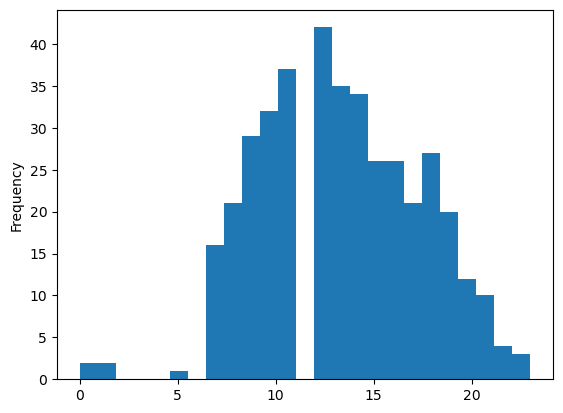

In [9]:
#HISTOGRAM
hist = customer_orders_products_merged['order_hour_of_day'].plot.hist(bins = 25)

In [19]:
hist.figure.savefig(r'C:\Users\B.Archibong\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\hist_orders_hod.png')

In [20]:
customer_orders_products_merged['order_hour_of_day'].describe()

count    400.000000
mean      13.365000
std        4.077787
min        0.000000
25%       10.000000
50%       13.000000
75%       16.000000
max       23.000000
Name: order_hour_of_day, dtype: float64

In [21]:
customer_orders_products_merged['prices'].mean()

6.26125

In [22]:
customer_orders_products_merged['prices'].median()

6.6

In [23]:
customer_orders_products_merged['prices'].max()

11.5

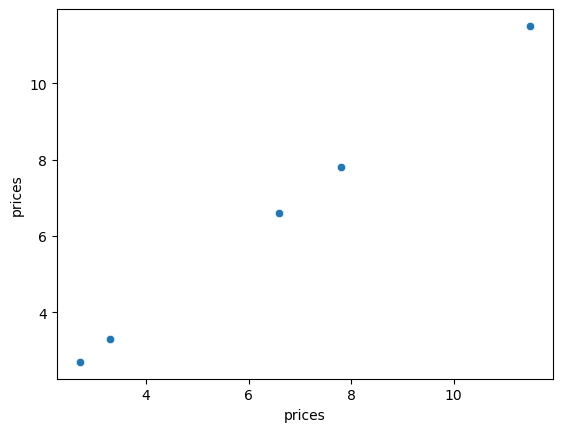

In [25]:
#Scatterplot
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = customer_orders_products_merged)

In [26]:
scatter.figure.savefig(r'C:\Users\B.Archibong\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\scatter_prices.png')

In [27]:
customer_orders_products_merged.loc[customer_orders_products_merged['prices'] > 100]

Empty DataFrame
Columns: [user_id, Age, marital_status, income, Unnamed: 0_x, product_id, product_name, aisle_id, department_id, prices, Unnamed: 0_y, order_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order, add_to_cart_order, reordered, _merge, price_range_loc, busiest_day, busiest_days, slowest_days, busiest_period_of_day]
Index: []

[0 rows x 25 columns]

In [28]:
customer_orders_products_merged.loc[customer_orders_products_merged['prices'] >100, 'prices'] = np.nan

In [29]:
customer_orders_products_merged['prices'].max()

11.5

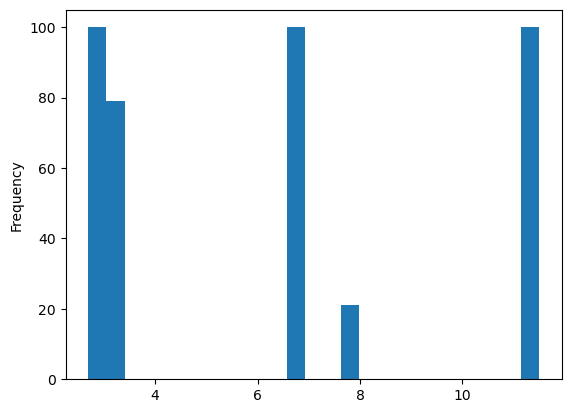

In [23]:
hist = customer_orders_products_merged['prices'].plot.hist(bins = 25)

In [30]:
hist.figure.savefig(r'C:\Users\B.Archibong\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\hist_prices.png')

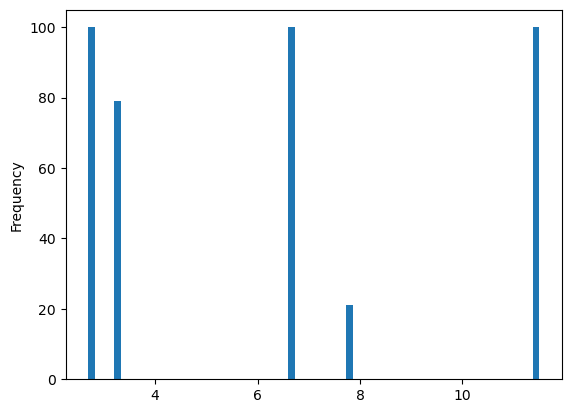

In [24]:
hist = customer_orders_products_merged['prices'].plot.hist(bins = 70)

In [31]:
hist.figure.savefig(r'C:\Users\B.Archibong\Downloads\Instacart Basket Analysis\04 Analysis\Visualizations\hist_prices.png')

In [32]:
np.random.seed(4)
dev = np.random.rand(len(customer_orders_products_merged)) <= 0.7

In [33]:
dev

array([False,  True, False, False,  True,  True, False,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False, False, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
        True,  True,

In [34]:
np.random.rand(10)

array([0.87961844, 0.65889906, 0.79942631, 0.18955688, 0.71909849,
       0.98085963, 0.90877826, 0.78428749, 0.89299903, 0.45508291])

In [35]:
#create a list holding True/False values to the test np.random.rant <> <=0.7  
dev = np.random.rand(len(customer_orders_products_merged))<=0.7

In [36]:
# Store 70% of the sample in the dataframe big
big = customer_orders_products_merged[dev]
                                

In [37]:
# Store 30% of the sample in the dataframe small
small = customer_orders_products_merged[dev]

In [38]:
len(customer_orders_products_merged)

500

In [39]:
customer_orders_products_merged.to_csv(r'C:\Users\B.Archibong\Downloads\Instacart Basket Analysis\02 Data\Prepared Data\customer_orders_products_merged.csv')